In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/resource.csv')

i want to implement an ml model that would use ML to determine where resources should be sent to a location affected by a natural disaster. The dataset has the following attributes

In [ ]:
df.head()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Families_affected,Individuals_affected,Houses_damaged,Houses_destroyed
0,Southern,AF27,Kandahar,AF2703,Daman,02-01-2022,Flood / flash flood,0,0,3,25,3,0
1,Southern,AF27,Kandahar,AF2702,Arghandab,02-01-2022,Flood / flash flood,0,0,4,40,4,0
2,Southern,AF27,Kandahar,AF2705,Zheray,02-01-2022,Flood / flash flood,0,0,3,30,3,0
3,Southern,AF27,Kandahar,AF2701,Kandahar,03-01-2022,Flood / flash flood,0,0,29,232,29,0
4,Southern,AF30,Hilmand,AF3002,Nad-e-Ali,04-01-2022,Flood / flash flood,2,2,171,1360,129,42


In [ ]:
df.columns

Index(['REGION', 'PROV_CODE', 'PROV_NAME', 'DIST_CODE', 'DIST_NAME',
       'INC_DATE', 'INC_TYPE', 'Persons_killed', 'Persons_injured',
       'Families_affected', 'Individuals_affected', 'Houses_damaged',
       'Houses_destroyed'],
      dtype='object')

In [ ]:
df['Resource Sum']=df['Persons_killed']+df['Persons_injured']+df['Families_affected']+df['Individuals_affected']+df['Houses_damaged']+df['Houses_destroyed']

In [ ]:
df.head()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Families_affected,Individuals_affected,Houses_damaged,Houses_destroyed,Resource Sum
0,Southern,AF27,Kandahar,AF2703,Daman,02-01-2022,Flood / flash flood,0,0,3,25,3,0,31
1,Southern,AF27,Kandahar,AF2702,Arghandab,02-01-2022,Flood / flash flood,0,0,4,40,4,0,48
2,Southern,AF27,Kandahar,AF2705,Zheray,02-01-2022,Flood / flash flood,0,0,3,30,3,0,36
3,Southern,AF27,Kandahar,AF2701,Kandahar,03-01-2022,Flood / flash flood,0,0,29,232,29,0,290
4,Southern,AF30,Hilmand,AF3002,Nad-e-Ali,04-01-2022,Flood / flash flood,2,2,171,1360,129,42,1706


In [ ]:
df.isnull().sum()

REGION                  0
PROV_CODE               0
PROV_NAME               0
DIST_CODE               0
DIST_NAME               0
INC_DATE                0
INC_TYPE                0
Persons_killed          0
Persons_injured         0
Families_affected       0
Individuals_affected    0
Houses_damaged          0
Houses_destroyed        0
Resource Sum            0
dtype: int64

In [ ]:
col=df['Resource Sum']

In [ ]:
cols=['Persons_killed', 'Persons_injured','Families_affected', 'Individuals_affected', 'Houses_damaged','Houses_destroyed']
data=df[cols]

In [ ]:
from sklearn.cluster import KMeans
# Define the number of clusters (k=5 in this case)
kmeans = KMeans(n_clusters=5)

# Fit the model to the data (use scaled data if applicable)
kmeans.fit(data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['Resource Demand 2']= cluster_labels

In [ ]:
df.head()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Families_affected,Individuals_affected,Houses_damaged,Houses_destroyed,Resource Sum,Resource Demand 2
0,Southern,AF27,Kandahar,AF2703,Daman,02-01-2022,Flood / flash flood,0,0,3,25,3,0,31,0
1,Southern,AF27,Kandahar,AF2702,Arghandab,02-01-2022,Flood / flash flood,0,0,4,40,4,0,48,0
2,Southern,AF27,Kandahar,AF2705,Zheray,02-01-2022,Flood / flash flood,0,0,3,30,3,0,36,0
3,Southern,AF27,Kandahar,AF2701,Kandahar,03-01-2022,Flood / flash flood,0,0,29,232,29,0,290,0
4,Southern,AF30,Hilmand,AF3002,Nad-e-Ali,04-01-2022,Flood / flash flood,2,2,171,1360,129,42,1706,4


In [ ]:
df['Resource Demand 2'].unique()

array([0, 4, 1, 3, 2], dtype=int32)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[4.88175676e-01, 1.05574324e+00, 1.95641892e+01, 1.36812500e+02,
        1.27736486e+01, 5.98479730e+00],
       [5.50000000e+00, 2.83571429e+01, 3.24785714e+02, 2.49542857e+03,
        1.95500000e+02, 1.18071429e+02],
       [0.00000000e+00, 0.00000000e+00, 1.33000000e+03, 9.31000000e+03,
        1.14800000e+03, 1.82000000e+02],
       [2.25000000e+00, 1.82500000e+01, 6.10500000e+02, 4.84825000e+03,
        3.78500000e+02, 2.34250000e+02],
       [2.21782178e+00, 5.38613861e+00, 1.50158416e+02, 1.03653465e+03,
        9.59504950e+01, 5.09702970e+01]])

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have your data (`data`) and the fitted KMeans model (`kmeans`) with cluster labels (`kmeans.labels_`)

silhouette_coeff = silhouette_score(data, kmeans.labels_)

print("Silhouette Coefficient:", silhouette_coeff)


Silhouette Coefficient: 0.7638907913545515


In [ ]:
centroids.shape

(5, 6)

In [ ]:
import numpy as np
cent=np.array(centroids)
row_sums=cent.sum(axis=1)


In [ ]:
row_sums

array([  176.67905405,  3167.64285714, 11970.        ,  6092.        ,
        1341.21782178])

In [ ]:
cluster_labels

array([0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 1, 4, 4, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,

In [ ]:
data['Resource Demand 2']= cluster_labels

<ipython-input-21-33a9585c0224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Resource Demand 2']= cluster_labels


In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(data, color='Resource Demand 2', dimensions=cols)  # Replace 'cluster' with your cluster label column
fig.show()

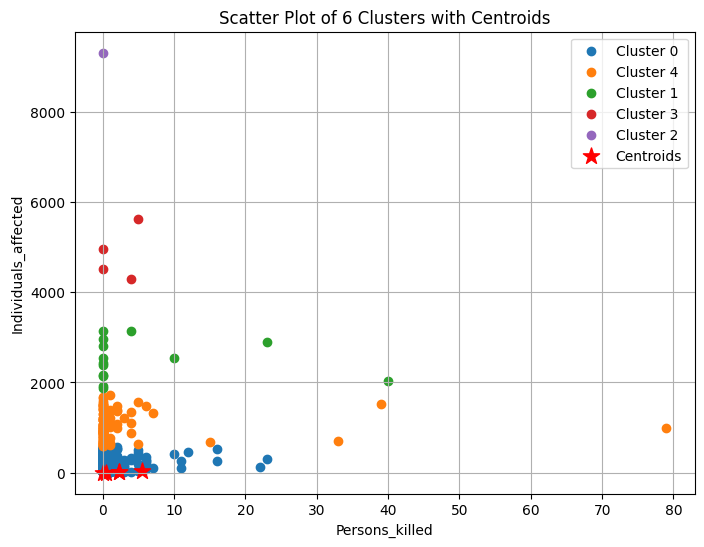

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data (`data`) with features in separate columns and cluster labels (`cluster`)
# Assuming you have the centroids (`centroids`) from your fitted KMeans model

# Separate data by cluster for easier plotting
clustered_data = {}
for i in range(len(data)):
  cluster_label = data.loc[i, 'Resource Demand 2']  # Replace 'cluster' with your cluster label column name
  if cluster_label not in clustered_data:
    clustered_data[cluster_label] = []
  clustered_data[cluster_label].append(data.iloc[i])

# Choose the features you want to visualize (replace with your actual column names)
feature1 = 'Persons_killed'
feature2 = 'Individuals_affected'

# Create the plot
plt.figure(figsize=(8, 6))

# Plot data points for each cluster
for cluster, points in clustered_data.items():
  x = [point[feature1] for point in points]
  y = [point[feature2] for point in points]
  plt.scatter(x, y, label=f'Cluster {cluster}')

# Plot centroids (markers with distinct color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, c='red', label='Centroids')

# Add labels, title, and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of 6 Clusters with Centroids')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
def degree(x):
  Dict={0:'Non-critical',1:'Low',2:'Medium',3:'High',4:'Critical'}
  return Dict[x]


In [ ]:
df=df.drop(['Resource Sum'],axis=1)

In [ ]:
df['Resource Demand']=df['Resource Demand 2'].apply(degree)

In [ ]:
df.head()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Families_affected,Individuals_affected,Houses_damaged,Houses_destroyed,Resource Demand 2,Resource Demand
0,Southern,AF27,Kandahar,AF2703,Daman,02-01-2022,Flood / flash flood,0,0,3,25,3,0,0,Non-critical
1,Southern,AF27,Kandahar,AF2702,Arghandab,02-01-2022,Flood / flash flood,0,0,4,40,4,0,0,Non-critical
2,Southern,AF27,Kandahar,AF2705,Zheray,02-01-2022,Flood / flash flood,0,0,3,30,3,0,0,Non-critical
3,Southern,AF27,Kandahar,AF2701,Kandahar,03-01-2022,Flood / flash flood,0,0,29,232,29,0,0,Non-critical
4,Southern,AF30,Hilmand,AF3002,Nad-e-Ali,04-01-2022,Flood / flash flood,2,2,171,1360,129,42,4,Critical


In [ ]:
df.to_excel('resouce demand test.xlsx', index=False)

In [ ]:
import pickle

In [ ]:
with open("resource_model.pkl", "wb") as f:  # Open the file in binary write mode
    pickle.dump(kmeans, f)


In [ ]:
inputs=[[0,0,3,25,3,0]]
outputs=kmeans.predict(inputs)
print(outputs)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [ ]:
inputs=[[0,21,633,4966,400,233]]
outputs=kmeans.predict(inputs)
print(outputs)

[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [ ]:
inputs=[[0,0,229,1057,129,100]]
outputs=kmeans.predict(inputs)
print(outputs)

[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

